In [1]:
##### Standard Libraries #####
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")
sns.set_context("poster")

%matplotlib inline

In [2]:
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import tensorflow as tf
import numpy as np
from glob import glob
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras.layers import MaxPooling2D, Conv2D, Flatten, Dense, ZeroPadding2D

In [3]:
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping
import os

import sklearn.metrics

Loading the images

In [4]:
import cv2
import os

def load_images_from_folder(folder):
    images = []
    for filename in os.listdir(folder):
        img = cv2.imread(os.path.join(folder,filename))
        if img is not None:
            images.append(img)
    return images

In [5]:
import cv2
import glob

imdir = "F:/data science/corona lung dataset -CNN/data/covid/"
ext = ['jpeg', 'jpg', 'png']    # Add image formats here

files = []
[files.extend(glob.glob(imdir + '*.' + e)) for e in ext]

images = [cv2.imread(file) for file in files]

In [6]:
len(images)

151

In [7]:
norm_images = [cv2.imread(file) for file in glob.glob('F:/data science/corona lung dataset -CNN/data/normal/*.jpeg')]


In [8]:
norm=pd.DataFrame(norm_images,columns=["Images"])

C:\Users\LENOVO\AppData\Roaming\Python\Python310\site-packages\pandas\core\internals\construction.py:576: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  values = np.array([convert(v) for v in values])


In [9]:
norm

,Images
0,"[[[72, 72, 72], [68, 68, 68], [67, 67, 67], [7..."
1,"[[[0, 0, 0], [46, 46, 46], [43, 43, 43], [42, ..."
2,"[[[80, 80, 80], [79, 79, 79], [77, 77, 77], [7..."
3,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ..."
4,"[[[78, 78, 78], [79, 79, 79], [77, 77, 77], [7..."
...,...
146,"[[[5, 5, 5], [2, 2, 2], [1, 1, 1], [4, 4, 4], ..."
147,"[[[6, 6, 6], [6, 6, 6], [6, 6, 6], [6, 6, 6], ..."
148,"[[[77, 77, 77], [81, 81, 81], [85, 85, 85], [8..."
149,"[[[43, 43, 43], [45, 45, 45], [46, 46, 46], [4..."


In [10]:
cov=pd.DataFrame(images,columns=["Images"])

C:\Users\LENOVO\AppData\Roaming\Python\Python310\site-packages\pandas\core\internals\construction.py:576: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  values = np.array([convert(v) for v in values])


In [11]:
cov

,Images
0,"[[[182, 182, 182], [169, 169, 169], [152, 152,..."
1,"[[[255, 255, 255], [255, 255, 255], [126, 126,..."
2,"[[[253, 253, 253], [109, 109, 109], [107, 107,..."
3,"[[[39, 39, 39], [47, 47, 47], [49, 49, 49], [4..."
4,"[[[178, 178, 178], [178, 178, 178], [178, 178,..."
...,...
146,"[[[67, 67, 67], [72, 72, 72], [77, 77, 77], [7..."
147,"[[[3, 3, 3], [3, 3, 3], [3, 3, 3], [3, 3, 3], ..."
148,"[[[1, 1, 1], [1, 1, 1], [1, 1, 1], [1, 1, 1], ..."
149,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ..."


check and plot any one image

In [12]:
img1=images[0][0][0]
img1

array([182, 182, 182], dtype=uint8)

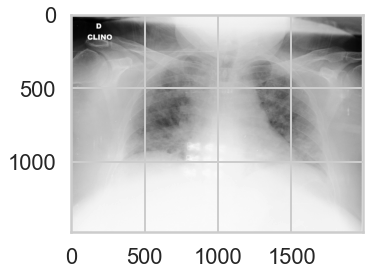

In [13]:
im = cv2.imread("F:/data science/corona lung dataset -CNN/data/covid/01E392EE-69F9-4E33-BFCE-E5C968654078.jpeg", 0) / 255

plt.imshow(im, cmap='gray', vmin=0, vmax=1) 
plt.show()

In [14]:
from keras.preprocessing import image

train_gen = image.ImageDataGenerator(rescale=1/255,horizontal_flip=True,zoom_range=0.2)

val_gen = image.ImageDataGenerator(rescale = 1/255)

In [15]:
DIR = 'F:/data science/corona lung dataset -CNN/data/'  #'/kaggle/input/covidct/'
SUBDIR_POS = 'covid/'
SUBDIR_NEG = 'normal/'
print(f'Positive samples: {len(os.listdir(DIR + SUBDIR_POS))}.')
print(f'Negative samples: {len(os.listdir(DIR + SUBDIR_NEG))}.')

Positive samples: 151.
Negative samples: 151.


In [16]:
EPOCHS = 40
BATCH_SIZE = 64
OPTIMIZER = tf.keras.optimizers.Adam(learning_rate=0.001, decay=0.001 / EPOCHS)
img_height, img_width = 248, 248
es = EarlyStopping(monitor='val_acc', mode='max',
                   verbose=1, 
                   patience=10, restore_best_weights=True)

In [17]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    horizontal_flip=True,
    rotation_range=5,
    width_shift_range=0.05,
    height_shift_range=0.05,
    shear_range=0.05,
    zoom_range=0.05,
    validation_split=0.2) 

train_generator = train_datagen.flow_from_directory(
    DIR,
    target_size=(img_height, img_width),
    batch_size=BATCH_SIZE,
    class_mode='binary',
    color_mode="grayscale",
    subset='training') 

validation_generator = train_datagen.flow_from_directory(
    DIR, 
    target_size=(img_height, img_width),
    batch_size=BATCH_SIZE,
    class_mode='binary',
    color_mode="grayscale",
    subset='validation')

Found 242 images belonging to 2 classes.
Found 60 images belonging to 2 classes.


In [18]:
train_generator

In [19]:
 validation_generator

model building

In [20]:
def create_model():
    model = Sequential([
        Conv2D(16, 1, padding='same', activation='relu', input_shape=(img_height, img_width, 1)),
        MaxPooling2D(),
        Conv2D(32, 3, padding='same', activation='relu'),
        MaxPooling2D(),
        Conv2D(64, 5, padding='same', activation='relu'),
        MaxPooling2D(),
        Conv2D(64, 5, padding='same', activation='relu'),
        MaxPooling2D(),
        
        Flatten(),
        Dense(128, activation='relu'),
        Dropout(0.4),
        Dense(64, activation='relu'),
        Dropout(0.5),
        Dense(8, activation='relu'),
        Dropout(0.3),
        Dense(1, activation='sigmoid')
    ])

    model.compile(optimizer=OPTIMIZER,
                  loss='binary_crossentropy',
                  metrics=['accuracy', 'Precision', 'Recall'])
    
    return model


In [21]:
model = create_model()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 248, 248, 16)      32        
                                                                 
 max_pooling2d (MaxPooling2D  (None, 124, 124, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 124, 124, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 62, 62, 64)        51264     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 31, 31, 64)       0

In [22]:
hist=model.fit(train_generator, validation_data=validation_generator, epochs=EPOCHS)

Epoch 1/40
4/4 [==============================] - 93s 12s/step - loss: 0.6987 - accuracy: 0.5413 - precision: 0.5368 - recall: 0.6033 - val_loss: 0.6874 - val_accuracy: 0.5000 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 2/40
4/4 [==============================] - 29s 7s/step - loss: 0.6941 - accuracy: 0.5207 - precision: 0.5243 - recall: 0.4463 - val_loss: 0.6823 - val_accuracy: 0.9333 - val_precision: 0.9333 - val_recall: 0.9333
Epoch 3/40
4/4 [==============================] - 26s 7s/step - loss: 0.6852 - accuracy: 0.5289 - precision: 0.5285 - recall: 0.5372 - val_loss: 0.6614 - val_accuracy: 0.8667 - val_precision: 0.8056 - val_recall: 0.9667
Epoch 4/40
4/4 [==============================] - 27s 7s/step - loss: 0.6571 - accuracy: 0.6322 - precision: 0.6212 - recall: 0.6777 - val_loss: 0.5543 - val_accuracy: 0.9333 - val_precision: 0.9333 - val_recall: 0.9333
Epoch 5/40
4/4 [==============================] - 27s 7s/step - loss: 0.5816 - accuracy: 0.6983 - precision: 0.

4/4 [==============================] - 26s 6s/step - loss: 0.0282 - accuracy: 1.0000 - precision: 1.0000 - recall: 1.0000 - val_loss: 0.0058 - val_accuracy: 1.0000 - val_precision: 1.0000 - val_recall: 1.0000
Epoch 39/40
4/4 [==============================] - 26s 6s/step - loss: 0.0322 - accuracy: 0.9876 - precision: 0.9917 - recall: 0.9835 - val_loss: 0.0505 - val_accuracy: 0.9833 - val_precision: 1.0000 - val_recall: 0.9667
Epoch 40/40
4/4 [==============================] - 26s 6s/step - loss: 0.0387 - accuracy: 0.9876 - precision: 0.9836 - recall: 0.9917 - val_loss: 9.0474e-05 - val_accuracy: 1.0000 - val_precision: 1.0000 - val_recall: 1.0000


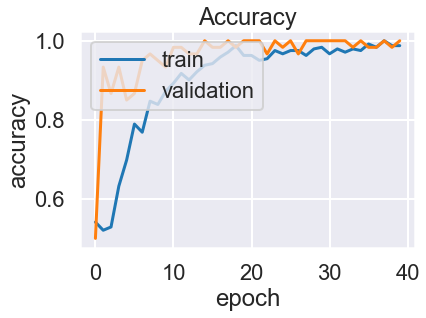

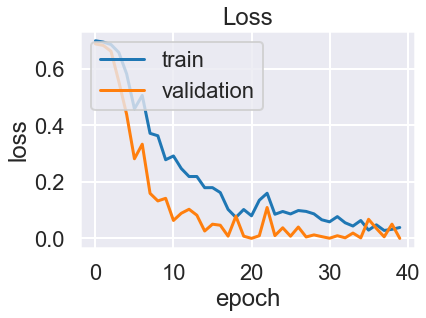

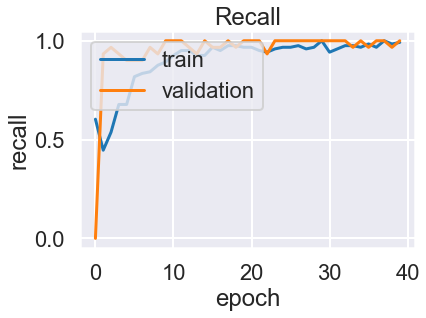

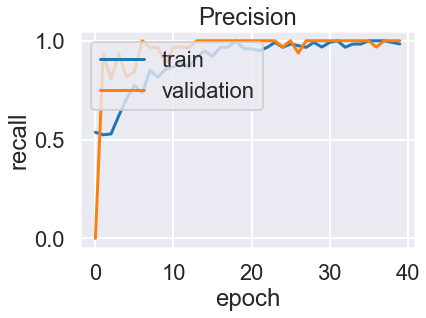

In [23]:
sns.set_style('darkgrid')

plt.title('Accuracy')
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

plt.title('Loss')
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

plt.title('Recall')
plt.plot(hist.history['recall'])
plt.plot(hist.history['val_recall'])
plt.ylabel('recall')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

plt.title('Precision')
plt.plot(hist.history['precision'])
plt.plot(hist.history['val_precision'])
plt.ylabel('recall')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

model testing

In [25]:
y_pred = (model.predict_generator(validation_generator) > 0.5).astype(int)
y_true = validation_generator.classes

for name, value in zip(model.metrics_names, model.evaluate_generator(validation_generator)):
    print(f'{name}: {value}')
    
print(f'F1 score: {sklearn.metrics.f1_score(y_true, y_pred)}')

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_4800\4182330657.py:1: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  y_pred = (model.predict_generator(validation_generator) > 0.5).astype(int)
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_4800\4182330657.py:4: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  for name, value in zip(model.metrics_names, model.evaluate_generator(validation_generator)):


loss: 0.0038841452915221453
accuracy: 1.0
precision: 1.0
recall: 1.0
F1 score: 0.5901639344262295


In [26]:
pd.DataFrame(sklearn.metrics.confusion_matrix(y_true, y_pred), 
             columns=['pred no covid', 'pred covid'], 
             index=['true no covid', 'true covid'])

,pred no covid,pred covid
true no covid,17,13
true covid,12,18


In [27]:
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
model.save_weights("model.h5")